# Use the Scatterwidget with AnnData from Notebook

This tutorial is an example of how to use the Napari-Spatialdata ScatterWidget from a notebook. It focuses on the annotation of the data.

## Import packages and data

There are two options to install napari-spatialdata:

(1) Run `pip install napari-spatialdata`

or, 

(2) Clone this [repo](https://github.com/scverse/napari-spatialdata) and run `pip install -e .`

In [1]:
from napari_spatialdata import QtAdataScatterWidget
import squidpy as sq
import matplotlib.pyplot as plt

Load in the AnnData:

In [2]:
adata = sq.datasets.visium_hne_adata()

The following line is needed to initialize a widget without a QApplication:

In [3]:
%gui qt5

Open the ScatterWidget:

In [4]:
widget = QtAdataScatterWidget(adata = adata)
widget.show()

At the bottom of the widget, there is a status line that, in this example, displays "No Napari viewer detected. You can save annotations to AnnData directly." This status line is important because the behavior of the save button changes depending on the data behind the widget. If you open the widget directly (starting with an AnnData structure and no Napari viewer), the "Save" button will allow you to save changed AnnData directly to your selected location.

Pick x-axis (obsm, umap, 0), y-axis (obsm, umap, 1), and color values (obs, total_count_mt) to visualize. Click the "Plot" button to generate the scatterplot. 

(-0.5, 1201.5, 816.5, -0.5)

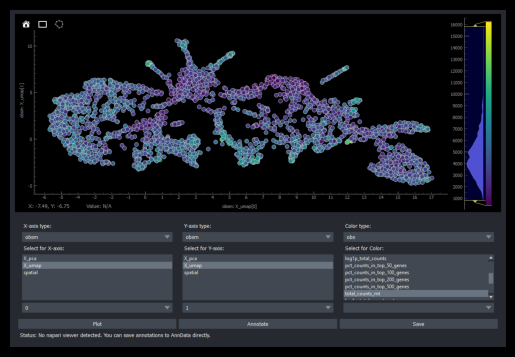

In [10]:
plt.imshow(widget.screenshot())
plt.axis('off')

You can use the lasso or rectangle tools to annotate several regions of interest (ROIs). Choose the annotation tool, left-click on the plot area, and start dragging with the left mouse button pressed. Release to finalize the ROI.

ROIs are editable—you can move vertices to change their shape, remove vertices, or add new vertices by clicking on the linear segment where a vertex should be added. Selected ROIs (ROIs are selected by hovering and have a continuous red boundary) can be moved around. 

To start drawing a new ROI, click the chosen tool icon again.

To remove an ROI, double-click on the selected ROI or press the 'd' key when an ROI is selected. 'Shift' + 'd' will clear all the ROIs.

ROIs persist when you change the color selection or visual details of the scatterplot. They will disappear when you change the selection for the x or y axis, as they only make sense in a single space.

(-0.5, 1201.5, 816.5, -0.5)

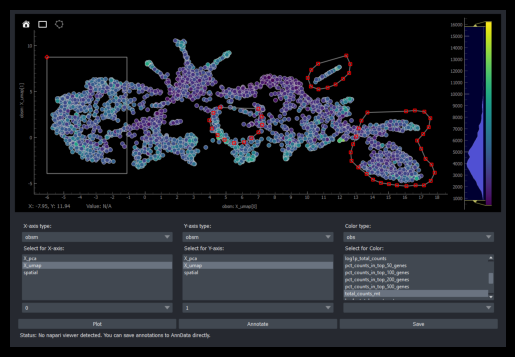

In [13]:
plt.imshow(widget.screenshot())
plt.axis('off')

When you are happy with the shape and position of the ROIs, you can use them to annotate the underlying points by clicking the 'Annotate' button.

A dialog will appear where you can enter the name of your annotation.

The new annotation will automatically appear as an option within the obs data frame. You can then use it as a binary label on the scatterplot (or in the View Widget - see other tutorials to use Scatter Widget and View Widgets simultaneously).

(-0.5, 1201.5, 816.5, -0.5)

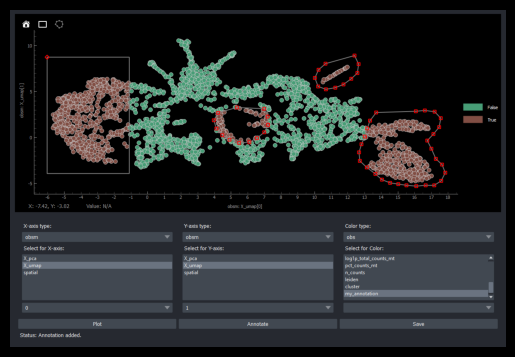

In [17]:
plt.imshow(widget.screenshot())
plt.axis('off')

As long as ROIs persist, you can change them to fine-tune the annotation.

If you request an annotation name that already exists, a new dialog will appear asking whether you want to overwrite the existing annotation (see a modified annotation below with a smaller rectangle on the left side).

Once the ROIs are removed, you cannot visualize them again. You can still overwrite the old annotation in the obs table, but you will need to draw all the ROIs from scratch.

You can create an unlimited number of annotations in the form of separate columns in the obs data frame. However, at the moment, you cannot create annotations of different classes and save them in a single column. We plan to work on this functionality in the future. Let us know if it's something important for your workflow, and we will prioritize it.

(-0.5, 1201.5, 816.5, -0.5)

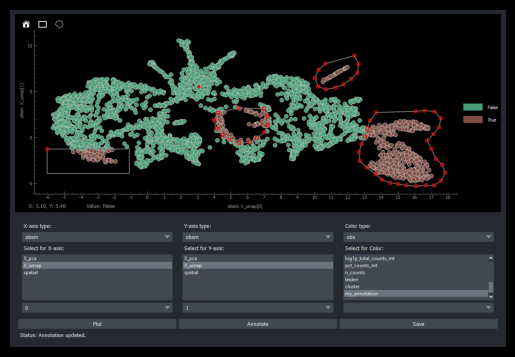

In [19]:
plt.imshow(widget.screenshot())
plt.axis('off')

You can use the 'Save' button to save the modified AnnData structure. The available formats for saving are 'h5ad' (default), 'zarr', and 'csv'.